In [46]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [47]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/383523/lesson_3_data__1_.csv', encoding='windows-1251')

In [48]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [49]:
user_df = df[['tc', 'art_sp']]

In [50]:
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [51]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

In [52]:
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [53]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

In [54]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

In [55]:
# user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])
# используем lambda функцию, чтобы разрезать строку по пробелу и взять последний элемент

In [56]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [57]:
users_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': 'count'}) \
    .rename(columns={'brand_name': 'purchases'})

In [58]:
users_purchases.describe()

,user_id,purchases
count,1.176400e+04,11764.000000
mean,7.690517e+07,4.091210
std,1.622210e+08,4.573143
min,-1.236395e+09,1.000000
25%,1.503761e+07,1.000000
50%,4.682179e+07,2.000000
75%,9.311601e+07,5.000000
max,1.408849e+09,60.000000


In [59]:
users_purchases.purchases.median()

2.0

In [60]:
users_purchases=users_purchases.query('purchases >= 5')

In [61]:
users_purchases.median()

user_id      28425471.0
purchases           7.0
dtype: float64

In [62]:
users_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [63]:
user_df.groupby(['user_id', 'brand_name'], as_index=False)\
    .agg({'brand_info': 'count'})\
    .query('user_id==1031')

,user_id,brand_name,brand_info
1,1031,Brand_3,1
2,1031,Store_Brand,5


In [64]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info': 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name': 'lovely_brand','brand_info': 'lovely_brand_purchases'})

In [65]:
lovely_brand_purchases_df

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [66]:
users_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns={'brand_name': 'unique_brands'})

In [67]:
users_unique_brands

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [68]:
??pd.DataFrame.merge

In [72]:
loyalty_df = users_purchases \
    .merge(users_unique_brands, on='user_id', how='inner') \
    .merge(lovely_brand_purchases_df, on='user_id', how='inner')

In [76]:
loyalty_df

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2
...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5
3379,1408783189,10,2,Store_Brand,8
3380,1408783379,6,2,Brand_1,4
3381,1408798879,8,3,Store_Brand,4


In [77]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

In [112]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases / loyalty_df.purchases

In [141]:
loyal_users

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


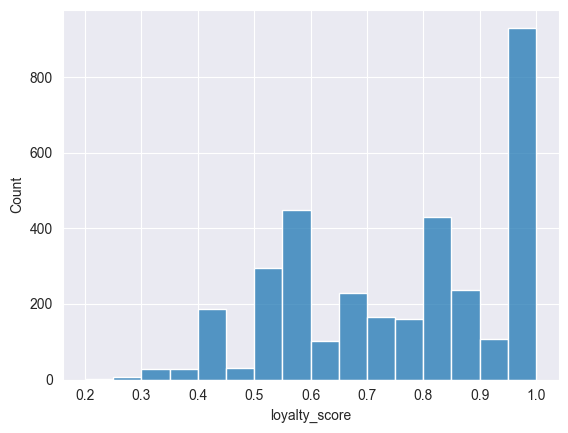

In [86]:
ax = sns.histplot(loyalty_df.loyalty_score)

In [111]:
loyalty_df.loyalty_score.describe()

count    3383.000000
mean        0.759356
std         0.198331
min         0.200000
25%         0.600000
50%         0.800000
75%         1.000000
max         1.000000
Name: loyalty_score, dtype: float64

In [117]:
loyalty_df.query('loyalty_score > 0.9 and lovely_brand == "Brand_4"').shape[0]

767

In [136]:
brands_loyalty = loyalty_df.groupby('lovely_brand', as_index=False) \
    .agg({'loyalty_score': 'median', 'user_id': 'count'})\
    .rename(columns={'user_id':'user_count'})\
    .sort_values(by='loyalty_score', ascending=False)

In [137]:
brands_loyalty

,lovely_brand,loyalty_score,user_count
3,Brand_4,0.818182,2041
6,Store_Brand,0.750000,715
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
4,Brand_5,0.600000,5
2,Brand_3,0.500000,115
5,Brand_7,0.444444,9


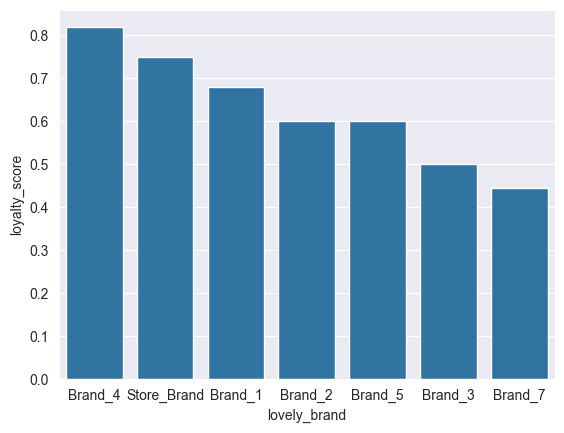

In [138]:
ax=sns.barplot(x="lovely_brand", y="loyalty_score", data=brands_loyalty)

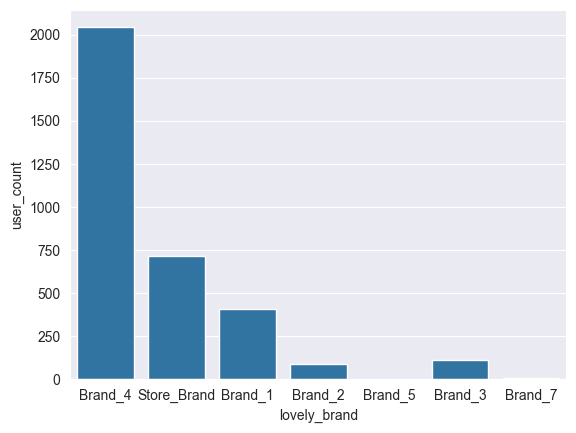

In [139]:
ax2=sns.barplot(x="lovely_brand", y="user_count", data=brands_loyalty)

Вывод: Бренд 4 имеет максимальную лояльность (767 покупателей из 3383)